# In this asset we will have a detailed look at association/correlation between categorical variables.
# We will use Khi-Square tests to check existence of association between categorical variables and the Cramer's V test to check the strength 
# of the association between variables.
# once that is done we will be in a better position to select the categorical variables -features- that will best explain the label which 
# is also categorical.

In [2]:
# For we install Prince for Correspondence Analysis -CA- suited for looking at correlation between categorical variables
!pip install git+https://github.com/MaxHalford/Prince  # doctest: +SKIP

  Cloning https://github.com/MaxHalford/Prince to /tmp/pip-req-build-ur3x_hic
    100% |████████████████████████████████| 17.3MB 2.3MB/s 
  Stored in directory: /tmp/pip-ephem-wheel-cache-uvufnk55/wheels/59/35/55/c6f9d6f898d74a07502ce2a3997c8c8ddc04dd54ba2391fc27
Successfully built prince
  Found existing installation: numpy 1.15.4
    Uninstalling numpy-1.15.4:
      Successfully uninstalled numpy-1.15.4


In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import prince
# Importing the database
dataset = pd.read_csv('nhiesincml.csv',index_col = 0)

In [4]:
dataset.shape

(10090, 15)

In [5]:
dataset.head()

,sex_of_head,age_group,age_of_head,reg_urb,main_language,main_sourceincome,tenure,urbrur_head,attain,apci,ncons_exp,g01_food,income,cons_exp,apci_groups
0,2,3,35,2,5,1,3,4,3.0,23453.849609,1800.0,6681.848633,23453.849609,21653.849609,3
1,2,2,25,2,10,5,4,4,3.0,29355.007812,1800.0,10505.010742,29355.007812,27555.007812,3
2,1,4,51,2,5,1,1,3,2.0,91796.781250,2500.0,35028.773438,91796.781250,89296.773438,5
3,2,4,54,2,5,5,1,4,3.0,16954.039062,0.0,1756.040039,16954.039062,16954.039062,3
4,1,3,35,2,12,1,3,3,3.0,24646.001953,960.0,9542.000000,49292.003906,48332.000000,3


In [6]:
# taking the subset of variables of interest 
mcads = dataset[['sex_of_head','age_group','main_language','main_sourceincome','tenure', 'urbrur_head','attain','apci_groups']]

In [7]:
# renaming columns for convenience
mcads = mcads.rename({'main_language':'language', 'main_sourceincome':'income_source'}, axis=1)

In [8]:
mcads.shape

(10090, 8)

In [9]:
mcads.head()

,sex_of_head,age_group,language,income_source,tenure,urbrur_head,attain,apci_groups
0,2,3,5,1,3,4,3.0,3
1,2,2,10,5,4,4,3.0,3
2,1,4,5,1,1,3,2.0,5
3,2,4,5,5,1,4,3.0,3
4,1,3,12,1,3,3,3.0,3


# STEP 1 -- Looking at the association/correlation between our categorical variables using Multiple Correspondence Analysis -- MCA --
# And Chi Square Tests

In [10]:
# Fit MCA
# this will show graphical how this categorical variables are related 
mca = prince.MCA(n_components=2,n_iter=4,copy=True,check_input=True,engine='auto',random_state=42)
mca = mca.fit(mcads)

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


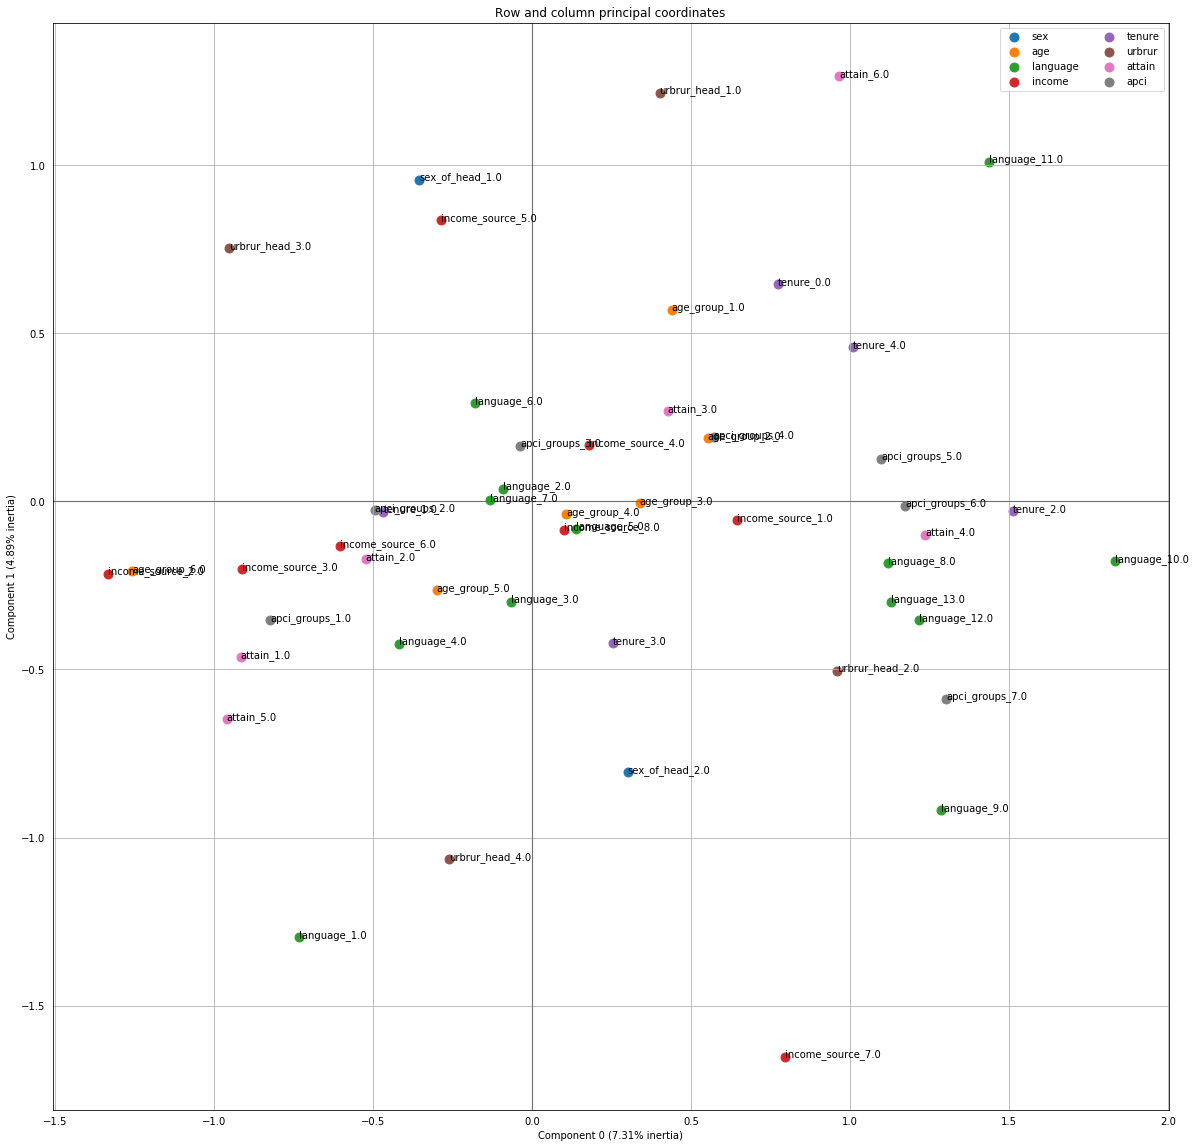

In [11]:
# Plot mca coordinates
ax = mca.plot_coordinates(X=mcads,ax=None,figsize=(20, 20),show_row_points=False,row_points_size=50,show_row_labels=False,show_column_points=True,\
column_points_size=80,show_column_labels=True,legend_n_cols=2)
# ax.get_figure().savefig('mca_coordinates.png')

#### You will remember that the variable we want to predict is 'apci_groups' with 7 income percentile levels; 
#### apci_groups_5 and above are the high income group
#### In this plot we see that these groups correlate with language groups 10, 11, 12, 13 and with level of education attain_4.0, etc.

No handles with labels found to put in legend.


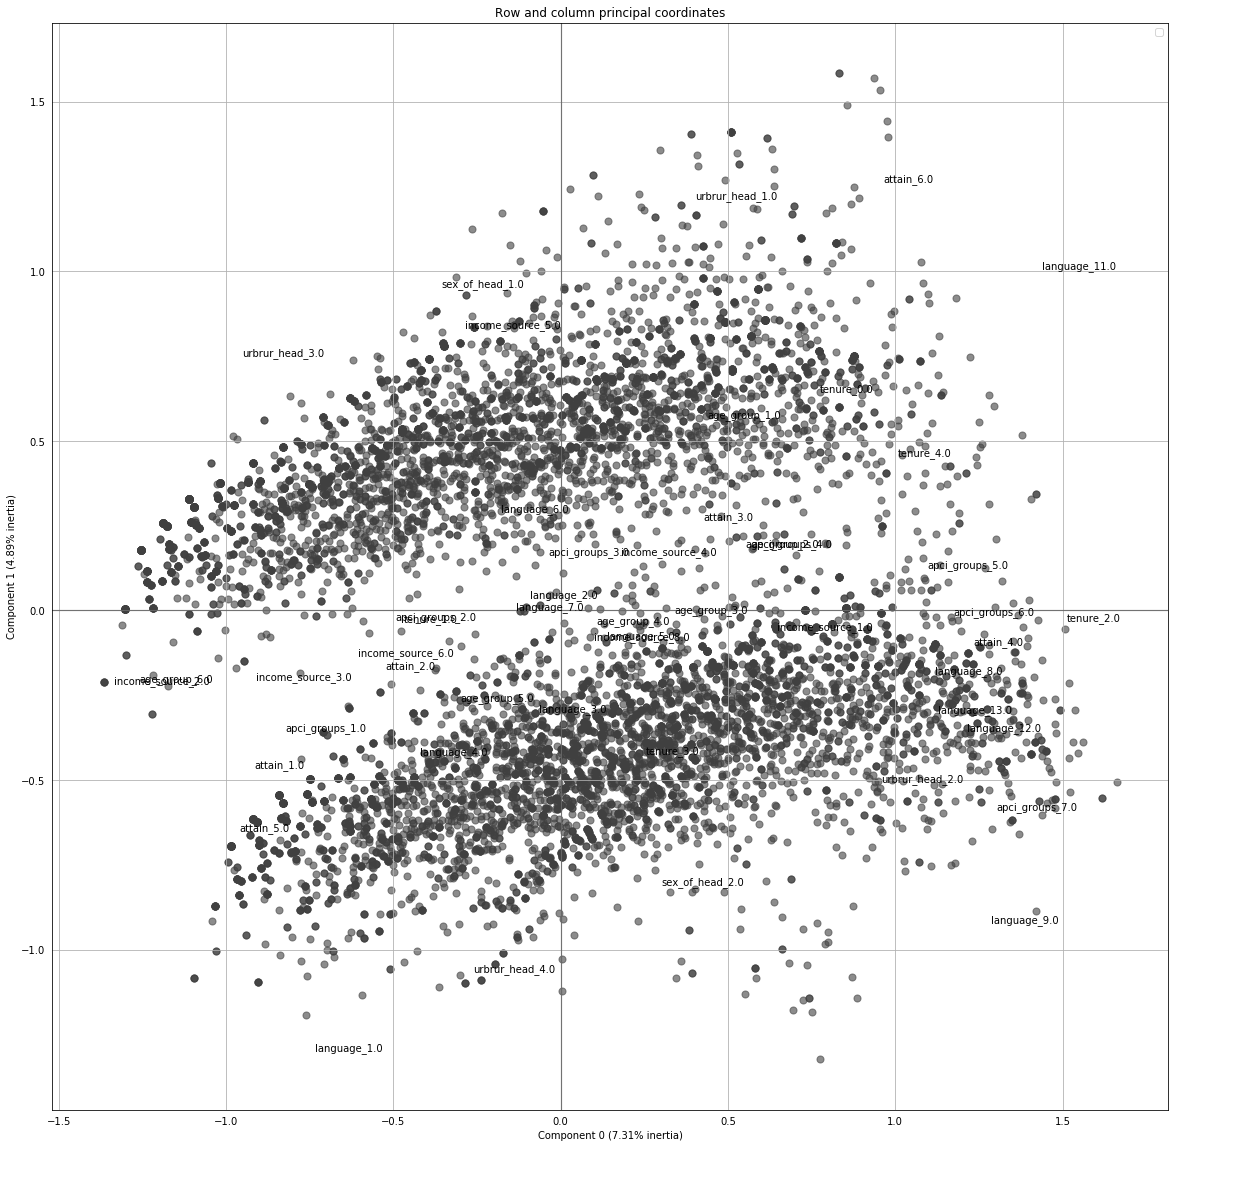

In [12]:
# Plot mca coordinates
ax = mca.plot_coordinates(X=mcads,ax=None,figsize=(20, 20),show_row_points=True,row_points_size=50,show_row_labels=False,show_column_points=False,\
column_points_size=80,show_column_labels=True,legend_n_cols=2)
# ax.get_figure().savefig('mca_coordinates.png')

#### This shows the individual observations -2 distinct groups along component 1- plotted against the categorical variables. Quite instructive

## Now looking at relationships between the label -- apci_groups -- and the features with crosstabs

In [13]:
# For chi-squared test of similar proportions
import scipy.stats as ss
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [14]:
# Defining a function to perform and print chi-squared tests
def chisquare(table):
    stat, p, dof, expected = chi2_contingency(table)
    print('Degree Of Freedom=%d' % dof)
    print(expected)
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject null hypothesis H0)')
    else:
        print('Independent (fail to reject H0)')
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Table rows and columns are dependent (H0)')
    else:
        print('Table rows and columns are independent (fail to reject H0)')

In [15]:
# Relationship between the label/dependent variable apci_groups and sex_of_head of household
apci_sex = pd.crosstab(mcads.apci_groups, mcads.sex_of_head, margins=False)
apci_sex

sex_of_head,1,2
apci_groups,,
1,929,924
2,1091,1139
3,1310,1379
4,811,1089
5,251,457
6,150,262
7,74,224


In [15]:
apci_sex.columns=['Female', 'Male']
apci_sex.index=["1-25","26-50","51-75","76-90","91-95","96-98","99-100"]

In [16]:
ca = prince.CA(n_components=2,n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
apci_sex.columns.rename('Sex Household Head', inplace=True)
apci_sex.index.rename('Income Group', inplace=True)
ca = ca.fit(apci_sex)

In [17]:
ca.row_coordinates(apci_sex)

,0,1
1-25,-0.088052,-1.0
26-50,-0.063741,-1.0
51-75,-0.059590,-1.0
76-90,0.061504,-1.0
91-95,0.206674,-1.0
96-98,0.187489,-1.0
99-100,0.419842,-1.0


In [18]:
ca.column_coordinates(apci_sex)

,0,1
Female,-0.127084,0.75041
Male,0.107165,0.75041


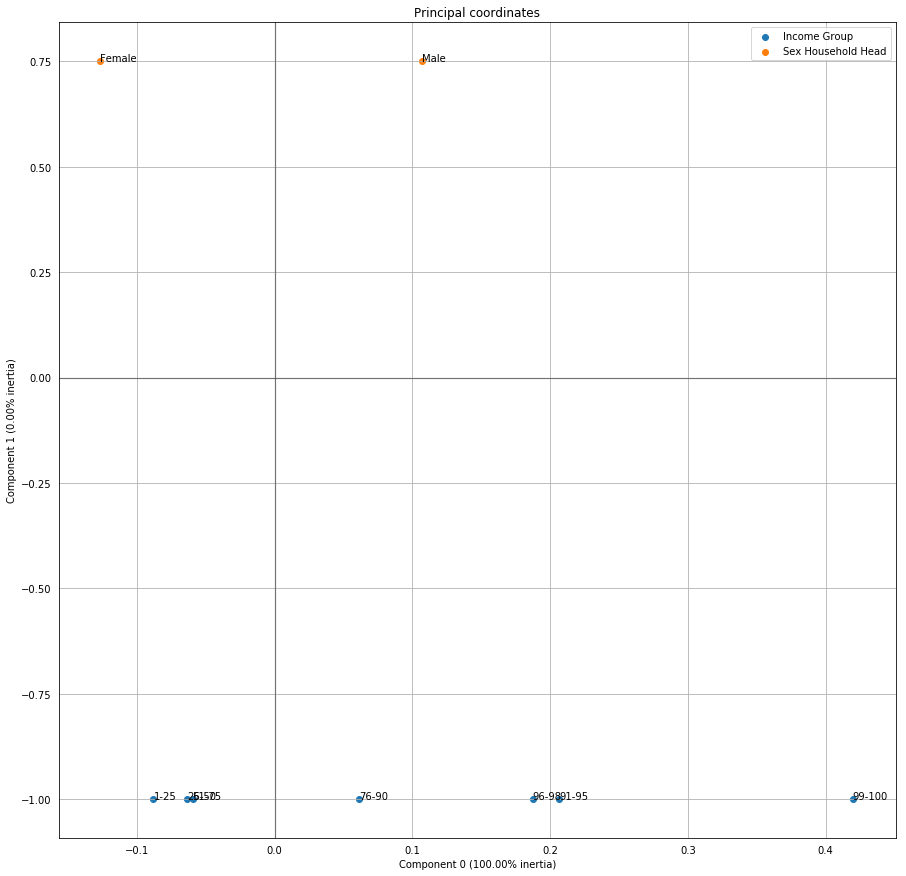

In [19]:
ax = ca.plot_coordinates(X=apci_sex,ax=None,figsize=(15,15),x_component=0,y_component=1,show_row_labels=True,show_col_labels=True)
# ax.get_figure().savefig('ca_coordinates.png')

#### Clear separation between male headed and female headed households; male tend to lean towards the high income groups contrary to females. 

In [20]:
# Chi-square Statistics
chisquare(apci_sex)

Degree Of Freedom=6
[[ 847.71536174 1005.28463826]
 [1020.18632309 1209.81367691]
 [1230.17086224 1458.82913776]
 [ 869.21704658 1030.78295342]
 [ 323.89772052  384.10227948]
 [ 188.48285431  223.51714569]
 [ 136.32983152  161.67016848]]
probability=0.950, critical=12.592, stat=137.415
Dependent (reject null hypothesis H0)
significance=0.050, p=0.000
Table rows and columns are dependent (H0)


### In conclusion, there is a correlation between apci_group and sex_of_head

In [21]:
# apci_groups and age_group
apci_age = pd.crosstab(mcads.apci_groups, mcads.age_group, margins=False)
apci_age

age_group,1,2,3,4,5,6
apci_groups,,,,,,
1,68,266,395,355,297,472
2,140,369,504,409,317,491
3,202,589,651,503,331,413
4,171,521,494,345,203,166
5,55,213,184,132,91,33
6,30,102,105,89,53,33
7,15,63,58,61,60,41


In [22]:
apci_age.columns=["12-24","25-34","35-44","45-54","55-64","65-107"]
apci_age.index=["1-25","26-50","51-75","76-90","91-95","96-98","99-100"]

In [23]:
ca = prince.CA(n_components=2,n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
apci_age.columns.rename('Age Group', inplace=True)
apci_age.index.rename('Income Group', inplace=True)
ca = ca.fit(apci_age)

In [24]:
ca.row_coordinates(apci_age)

,0,1
1-25,0.303964,0.030350
26-50,0.171495,-0.031089
51-75,-0.044237,-0.028333
76-90,-0.263001,-0.030796
91-95,-0.345319,0.079022
96-98,-0.214203,0.066614
99-100,0.019168,0.216095


In [25]:
ca.column_coordinates(apci_age)

,0,1
12-24,-0.232085,-0.102936
25-34,-0.245120,0.009917
35-44,-0.071446,-0.025970
45-54,0.003850,0.027310
55-64,0.119016,0.101344
65-107,0.413017,-0.047060


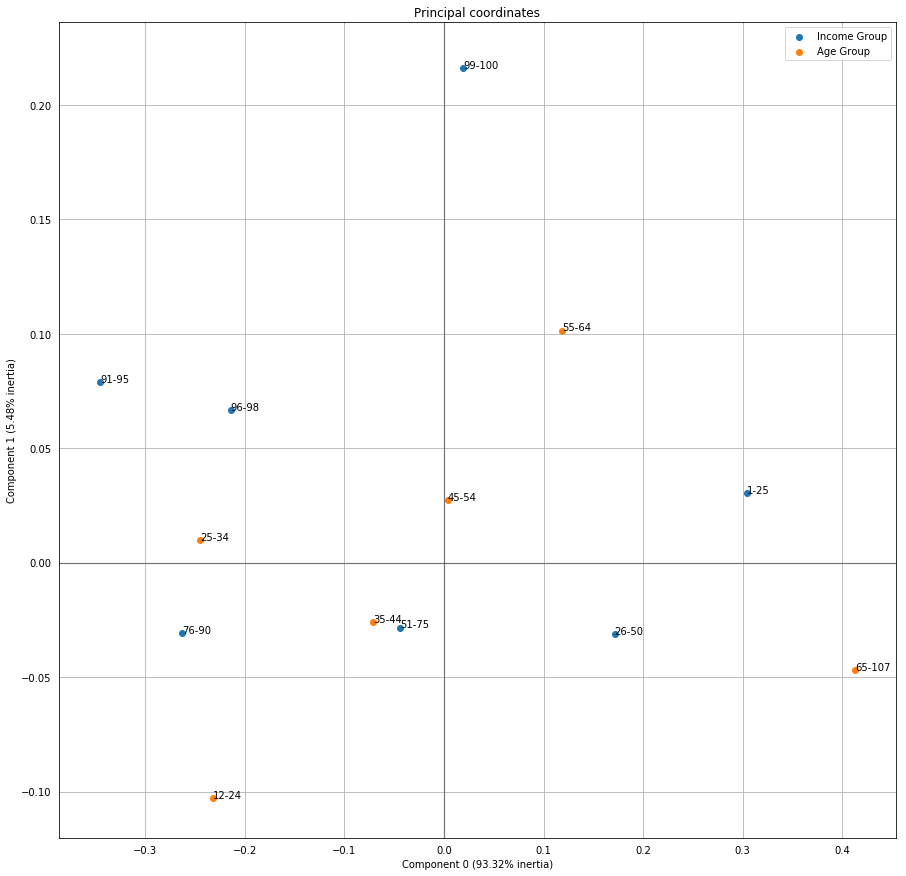

In [26]:
ax = ca.plot_coordinates(X=apci_age,ax=None,figsize=(15, 15),x_component=0,y_component=1,show_row_labels=True,show_col_labels=True)
#ax.get_figure().savefig('ca_coordinates.png')

In [27]:
# Chi-square Statistics
chisquare(apci_age)

Degree Of Freedom=30
[[125.06372646 389.88295342 439.10039643 347.82775025 248.29098117
  302.83419227]
 [150.50842418 469.2061447  528.4370664  418.59464817 298.80673935
  364.44697721]
 [181.48751239 565.7826561  637.20505451 504.75381566 360.31000991
  439.46095144]
 [128.23587711 399.77205154 450.23785927 356.65014866 254.58870168
  310.51536174]
 [ 47.78473736 148.96769078 167.7728444  132.89910803  94.86778989
  115.70782953]
 [ 27.80693756  86.68741328  97.63052527  77.33676908  55.20555005
   67.33280476]
 [ 20.11278494  62.70109019  70.61625372  55.93776016  39.93022795
   48.70188305]]
probability=0.950, critical=43.773, stat=511.061
Dependent (reject null hypothesis H0)
significance=0.050, p=0.000
Table rows and columns are dependent (H0)


### In conclusion, there is a correlation between apci_group and age_group

In [28]:
# apci_groups and language 
apci_lang = pd.crosstab(mcads.apci_groups, mcads.language, margins=False)
apci_lang

language,1,2,3,4,5,6,7,8,9,10,11,12,13
apci_groups,,,,,,,,,,,,,
1,84,196,197,413,282,627,4,23,0,0,1,10,16
2,37,130,206,353,338,1083,6,54,0,2,0,7,14
3,19,123,307,268,357,1410,8,135,0,9,4,21,28
4,2,84,186,175,202,973,8,176,2,26,13,20,33
5,1,24,61,40,67,300,4,136,5,25,7,15,23
6,2,10,32,19,32,143,1,94,8,21,5,21,24
7,1,5,11,4,14,74,0,97,18,28,5,14,27


In [29]:
apci_lang.columns=["Khoisan","Zambezi languages","Otjiherero","Rukavango","Nama/Damara","Oshiwambo","Setswana","Afrikaans","German","English","Other European","Other African","Other"]
apci_lang.index=["1-25","26-50","51-75","76-90","91-95","96-98","99-100"]

In [30]:
ca = prince.CA(n_components=2,n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
apci_lang.columns.rename('Language Spoken', inplace=True)
apci_lang.index.rename('Income Group', inplace=True)
ca = ca.fit(apci_lang)

In [31]:
ca.row_coordinates(apci_lang)

,0,1
1-25,-0.386823,0.371087
26-50,-0.256825,-0.012307
51-75,-0.097096,-0.171118
76-90,0.114306,-0.172346
91-95,0.582084,-0.077918
96-98,0.963384,0.114232
99-100,1.759677,0.454751


In [32]:
ca.column_coordinates(apci_lang)

,0,1
Khoisan,-0.602334,0.887478
Zambezi languages,-0.309270,0.303564
Otjiherero,-0.116155,-0.047276
Rukavango,-0.365171,0.271025
Nama/Damara,-0.195496,0.033948
Oshiwambo,-0.050309,-0.165257
Setswana,0.024598,-0.231355
Afrikaans,1.014926,-0.008572
German,2.880057,1.184652
English,1.724507,0.300542


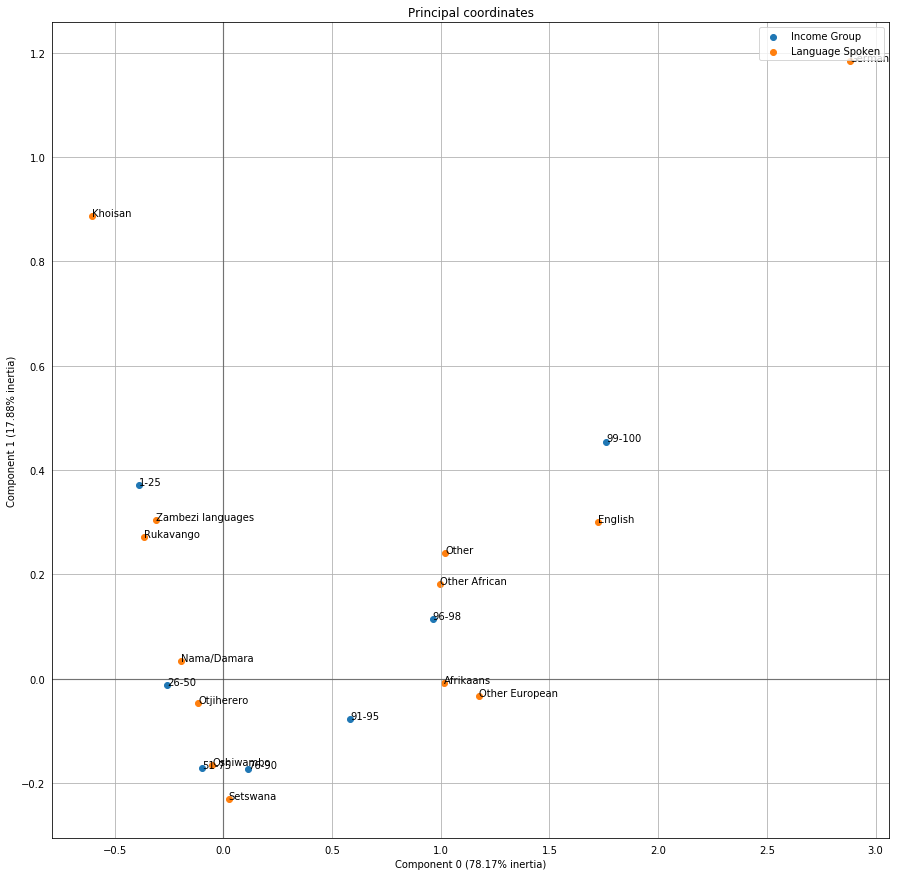

In [33]:
ax = ca.plot_coordinates(X=apci_lang,ax=None,figsize=(15, 15),x_component=0,y_component=1,show_row_labels=True,show_col_labels=True)
#ax.get_figure().savefig('ca_coordinates.png')

#### Quite instructive; one can literally rank household heads from lowest income groups on the left Khoisan to highest income group German on the right.
#### This language spoken variable will explain a great deal of the variance observed for our label/dependent variable 'apci_groups'

In [34]:
# Chi-square Statistics
chisquare(apci_lang)

Degree Of Freedom=72
[[2.68124876e+01 1.05046184e+02 1.83647175e+02 2.33599207e+02
  2.37272151e+02 8.46613479e+02 5.69306244e+00 1.31307730e+02
  6.06035679e+00 2.03848365e+01 6.42765114e+00 1.98338949e+01
  3.03017839e+01]
 [3.22675917e+01 1.26418236e+02 2.21010902e+02 2.81125867e+02
  2.85546085e+02 1.01886026e+03 6.85133796e+00 1.58022795e+02
  7.29335976e+00 2.45322101e+01 7.73538157e+00 2.38691774e+01
  3.64667988e+01]
 [3.89092170e+01 1.52438850e+02 2.66501487e+02 3.38989891e+02
  3.44319921e+02 1.22857185e+03 8.26154609e+00 1.90548563e+02
  8.79454906e+00 2.95816650e+01 9.32755203e+00 2.87821606e+01
  4.39727453e+01]
 [2.74925669e+01 1.07710605e+02 1.88305253e+02 2.39524281e+02
  2.43290387e+02 8.68087215e+02 5.83746283e+00 1.34638256e+02
  6.21407334e+00 2.09018831e+01 6.59068385e+00 2.03369673e+01
  3.10703667e+01]
 [1.02445986e+01 4.01363726e+01 7.01684836e+01 8.92543112e+01
  9.06576809e+01 3.23476710e+02 2.17522299e+00 5.01704658e+01
  2.31555996e+00 7.78870168e+00 2.45589

### In conclusion, there is a correlation between apci_group and language

In [35]:
# apci_groups and income source 
apci_incs = pd.crosstab(mcads.apci_groups, mcads.income_source, margins=False)
apci_incs

income_source,1,2,3,4,5,6,7,8
apci_groups,,,,,,,,
1,514,456,315,160,234,117,2,55
2,846,431,388,177,260,77,3,48
3,1365,351,327,252,258,73,2,61
4,1274,125,117,143,158,28,4,51
5,536,23,26,50,41,4,6,22
6,286,21,10,40,32,0,11,12
7,173,9,10,36,14,3,22,31


In [36]:
apci_incs.columns=["Salaries & wages","Pension","Subsistence farming","Business income","Remittances/grants","Drought/In-kind receipts","Commercial farming","Others"]
apci_incs.index=["1-25","26-50","51-75","76-90","91-95","96-98","99-100"]

In [37]:
ca = prince.CA(n_components=2,n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
apci_incs.columns.rename('Income Source', inplace=True)
apci_incs.index.rename('Income Group', inplace=True)
ca = ca.fit(apci_incs)

In [38]:
ca.row_coordinates(apci_incs)

,0,1
1-25,0.480057,0.096171
26-50,0.275348,0.006459
51-75,-0.008395,-0.068014
76-90,-0.345596,-0.144839
91-95,-0.551829,-0.109513
96-98,-0.552202,0.145329
99-100,-0.691823,0.950112


In [39]:
ca.column_coordinates(apci_incs)

,0,1
Salaries & wages,-0.303460,-0.080231
Pension,0.511964,0.051694
Subsistence farming,0.438036,0.007680
Business income,-0.001863,0.082064
Remittances/grants,0.215062,-0.014886
Drought/In-kind receipts,0.577725,0.090665
Commercial farming,-1.345764,2.273091
Others,-0.185863,0.434661


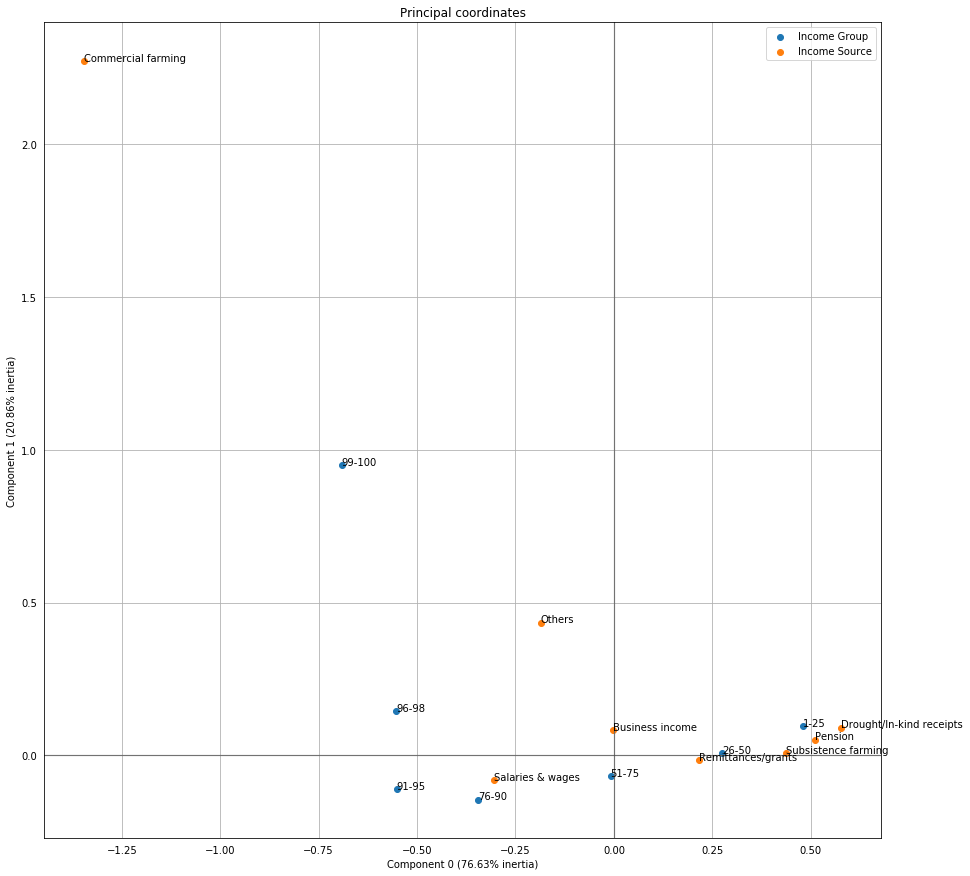

In [40]:
ax = ca.plot_coordinates(X=apci_incs,ax=None,figsize=(15, 15),x_component=0,y_component=1,show_row_labels=True,show_col_labels=True)
#ax.get_figure().savefig('ca_coordinates.png')

In [41]:
# Chi-square Statistics
chisquare(apci_incs)

Degree Of Freedom=42
[[ 917.13399405  260.0444004   219.09108028  157.56927651  183.09623389
    55.46144698    9.18235877   51.42120912]
 [1103.728444    312.95143707  263.66600595  189.62735382  220.34786918
    66.74529237   11.05054509   61.88305253]
 [1330.90842418  377.36610505  317.93627354  228.65827552  265.70198216
    80.48344896   13.32507433   74.62041625]
 [ 940.39643211  266.64023786  224.6481665   161.56590684  187.74033697
    56.86818632    9.41526264   52.72547076]
 [ 350.42140733   99.35857284   83.71100099   60.20455897   69.9579782
    21.19088206    3.50842418   19.64717542]
 [ 203.91754212   57.81883053   48.71318137   35.03429138   40.71000991
    12.33141724    2.04162537   11.43310208]
 [ 147.49375619   41.82041625   35.23429138   25.34033697   29.44558969
     8.91932607    1.47670961    8.26957384]]
probability=0.950, critical=58.124, stat=1705.700
Dependent (reject null hypothesis H0)
significance=0.050, p=0.000
Table rows and columns are dependent (H0)


### In conclusion, there is a correlation between apci_group and source of income

In [42]:
# apci_groups and tenure 
apci_ten = pd.crosstab(mcads.apci_groups, mcads.tenure, margins=False)
apci_ten

tenure,0,1,2,3,4
apci_groups,,,,,
1,2,1506,2,241,102
2,0,1651,21,318,240
3,2,1684,76,438,489
4,0,873,137,329,561
5,0,234,90,132,252
6,1,167,70,43,131
7,0,153,50,18,77


In [43]:
apci_ten.columns=["Not stated","Owned with no mortgage","Owned with mortgage","Occupied free","Rented"]
apci_ten.index=["1-25","26-50","51-75","76-90","91-95","96-98","99-100"]

In [44]:
ca = prince.CA(n_components=2,n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
apci_ten.columns.rename('Tenure', inplace=True)
apci_ten.index.rename('Income Group', inplace=True)
ca = ca.fit(apci_ten)

In [45]:
ca.row_coordinates(apci_ten)

,0,1
1-25,0.434166,0.075680
26-50,0.286056,0.006893
51-75,0.049667,-0.064442
76-90,-0.347636,-0.101777
91-95,-0.676733,-0.043313
96-98,-0.684275,0.283510
99-100,-0.518163,0.419171


In [46]:
ca.column_coordinates(apci_ten)

,0,1
Not stated,0.154087,0.542557
Owned with no mortgage,0.240451,0.041482
Owned with mortgage,-1.046547,0.364988
Occupied free,-0.044919,-0.159107
Rented,-0.525338,-0.099256


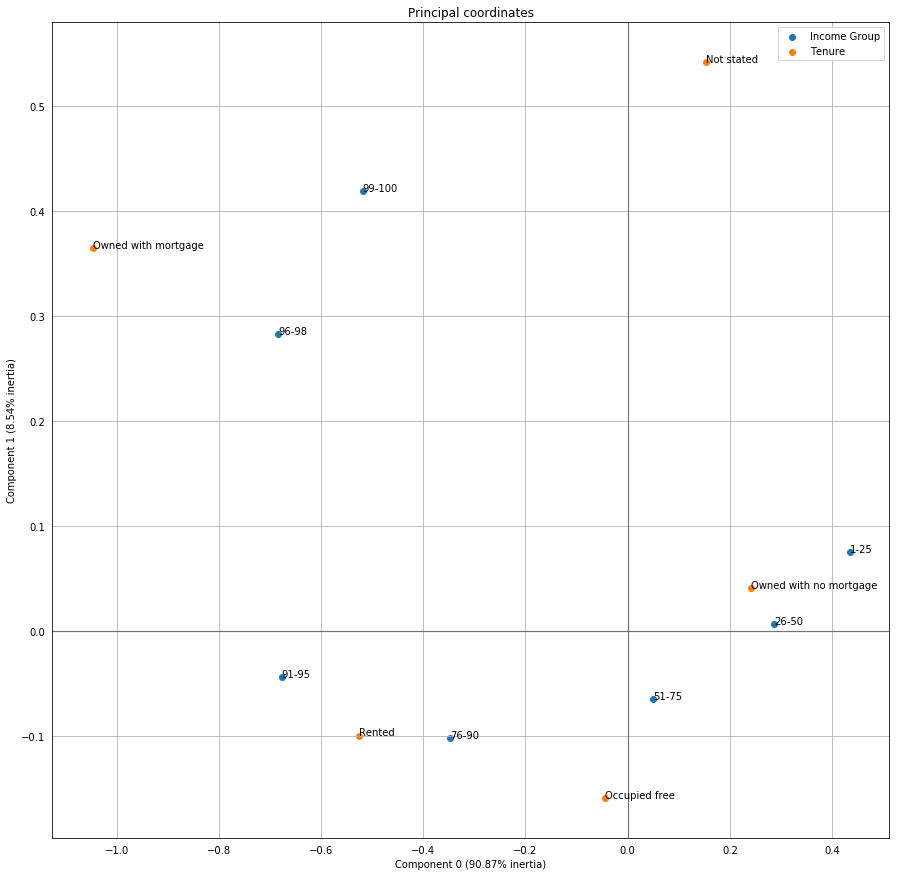

In [47]:
ax = ca.plot_coordinates(X=apci_ten,ax=None,figsize=(15, 15),x_component=0,y_component=1,show_row_labels=True,show_col_labels=True)
#ax.get_figure().savefig('ca_coordinates.png')

In [48]:
# Chi-square Statistics
chisquare(apci_ten)

Degree Of Freedom=24
[[9.18235877e-01 1.15110050e+03 8.19066402e+01 2.78960059e+02
  3.40114569e+02]
 [1.10505451e+00 1.38529633e+03 9.85708622e+01 3.35715560e+02
  4.09312190e+02]
 [1.33250743e+00 1.67043132e+03 1.18859663e+02 4.04815758e+02
  4.93560753e+02]
 [9.41526264e-01 1.18029732e+03 8.39841427e+01 2.86035679e+02
  3.48741328e+02]
 [3.50842418e-01 4.39816056e+02 3.12951437e+01 1.06585927e+02
  1.29952032e+02]
 [2.04162537e-01 2.55938157e+02 1.82112983e+01 6.20245788e+01
  7.56218038e+01]
 [1.47670961e-01 1.85120317e+02 1.31722498e+01 4.48624381e+01
  5.46973241e+01]]
probability=0.950, critical=36.415, stat=1502.330
Dependent (reject null hypothesis H0)
significance=0.050, p=0.000
Table rows and columns are dependent (H0)


### In conclusion, there is a correlation between apci_group and source of income

In [49]:
# apci_groups and urban rural head 
apci_urbr = pd.crosstab(mcads.apci_groups, mcads.urbrur_head, margins=False)
apci_urbr

urbrur_head,1,2,3,4
apci_groups,,,,
1,231,195,698,729
2,342,357,749,782
3,595,637,715,742
4,508,644,303,445
5,184,327,67,130
6,121,197,29,65
7,56,161,18,63


In [50]:
apci_urbr.columns=["urban female head","urban male head","rurral female head","rural male head"]
apci_urbr.index=["1-25","26-50","51-75","76-90","91-95","96-98","99-100"]

In [51]:
ca = prince.CA(n_components=2,n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
apci_urbr.columns.rename('Urban Rural Head', inplace=True)
apci_urbr.index.rename('Income Group', inplace=True)
ca = ca.fit(apci_urbr)

In [52]:
ca.row_coordinates(apci_urbr)

,0,1
1-25,0.450411,0.041941
26-50,0.282364,0.023714
51-75,0.003757,-0.058848
76-90,-0.312212,-0.052745
91-95,-0.579449,0.059009
96-98,-0.669045,0.001898
99-100,-0.655326,0.286235


In [53]:
ca.column_coordinates(apci_urbr)

,0,1
urban female head,-0.247258,-0.122838
urban male head,-0.485355,0.064378
rurral female head,0.394810,-0.010686
rural male head,0.239369,0.039133


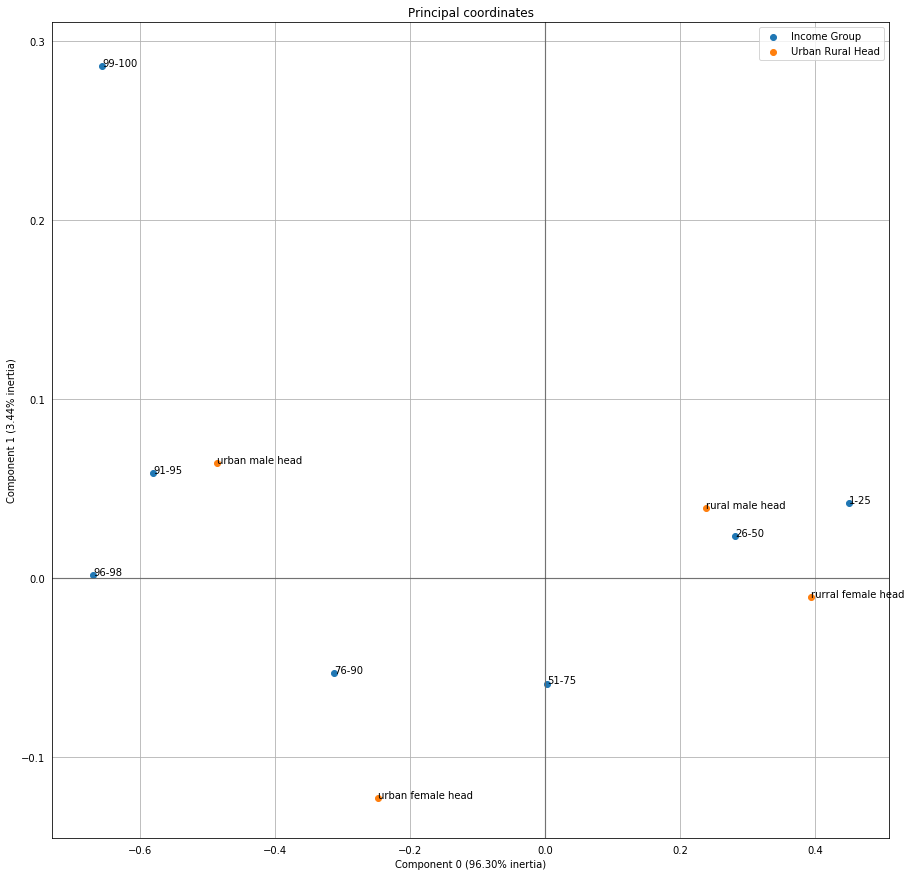

In [54]:
ax = ca.plot_coordinates(X=apci_urbr,ax=None,figsize=(15, 15),x_component=0,y_component=1,show_row_labels=True,show_col_labels=True)

In [55]:
# Chi-square Statistics
chisquare(apci_urbr)

Degree Of Freedom=18
[[374.08929633 462.42358771 473.62606541 542.86105055]
 [450.19920714 556.50545094 569.98711596 653.30822597]
 [542.86352825 671.05074331 687.30733399 787.77839445]
 [383.5777998  474.15262636 485.63924678 556.63032706]
 [142.93320119 176.68424182 180.96451933 207.41803766]
 [ 83.17581764 102.81625372 105.30703667 120.70089197]
 [ 60.16114965  74.36709613  76.16868186  87.30307235]]
probability=0.950, critical=28.869, stat=1338.607
Dependent (reject null hypothesis H0)
significance=0.050, p=0.000
Table rows and columns are dependent (H0)


### In conclusion, there is a correlation between apci_group and urb rural head

In [56]:
# apci_groups and educational attainment
apci_att = pd.crosstab(mcads.apci_groups, mcads.attain, margins=False)
apci_att

attain,1.0,2.0,3.0,4.0,5.0,6.0
apci_groups,,,,,,
1,705,679,415,14,26,14
2,531,819,810,36,11,23
3,443,763,1297,127,10,49
4,172,338,1021,266,4,99
5,27,79,343,202,3,54
6,18,32,172,160,1,29
7,9,15,112,141,0,21


In [57]:
apci_att.columns=["No formal education","Primary","Secondary","Tertiary","Not stated","Blank"]
apci_att.index=["1-25","26-50","51-75","76-90","91-95","96-98","99-100"]

In [58]:
ca = prince.CA(n_components=2,n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
apci_att.columns.rename('Attainment', inplace=True)
apci_att.index.rename('Income Group', inplace=True)
ca = ca.fit(apci_att)

In [59]:
ca.row_coordinates(apci_att)

,0,1
1-25,0.578406,0.293081
26-50,0.351018,-0.023341
51-75,0.088303,-0.183092
76-90,-0.359595,-0.172386
91-95,-0.828072,0.073781
96-98,-1.063774,0.320022
99-100,-1.289345,0.485757


In [60]:
ca.column_coordinates(apci_att)

,0,1
No formal education,0.535133,0.244974
Primary,0.366113,0.009450
Secondary,-0.160199,-0.206049
Tertiary,-1.212030,0.354818
Not stated,0.529113,0.477922
Blank,-0.801297,0.016796


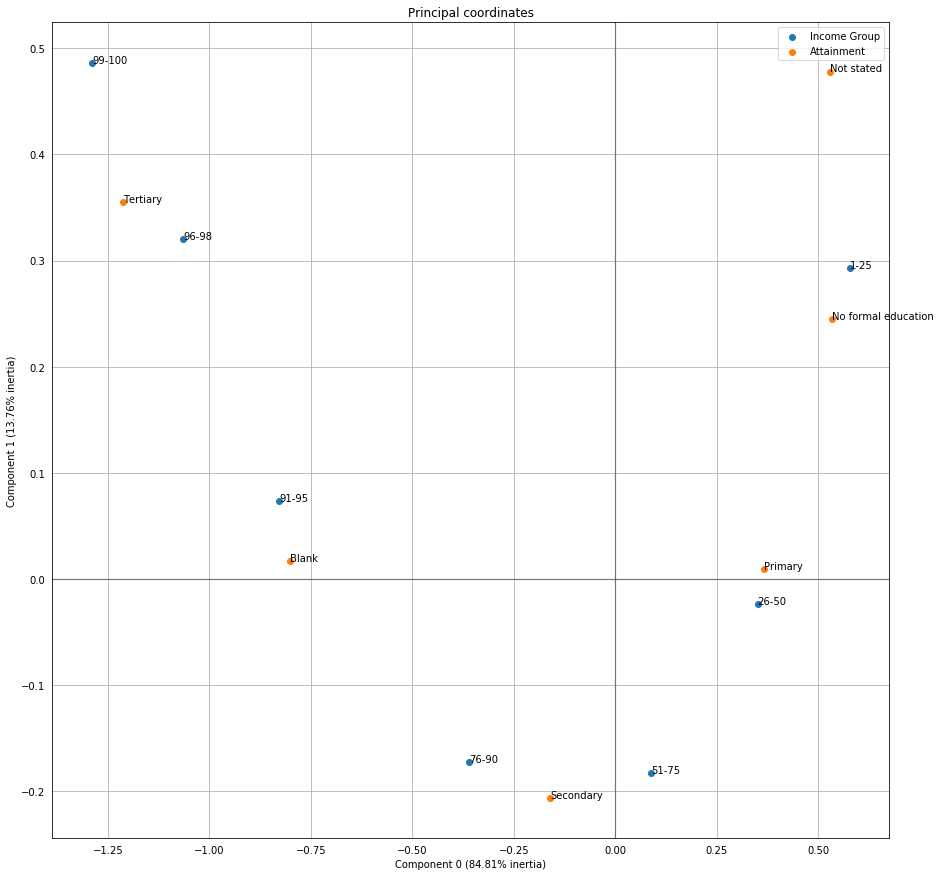

In [61]:
ax = ca.plot_coordinates(X=apci_att,ax=None,figsize=(15, 15),x_component=0,y_component=1,show_row_labels=True,show_col_labels=True)

In [62]:
# Chi-square Statistics
chisquare(apci_att)

Degree Of Freedom=30
[[ 349.84786918  500.43855302  765.80872151  173.73022795   10.10059465
    53.0740337 ]
 [ 421.02576809  602.25470763  921.61546085  209.07631318   12.1555996
    63.87215064]
 [ 507.68533201  726.21655104 1111.31119921  252.11040634   14.65758176
    77.01892963]
 [ 358.72150644  513.13181368  785.23290387  178.13676908   10.3567889
    54.42021804]
 [ 133.67096135  191.20911794  292.60257681   66.37938553    3.8592666
    20.27869177]
 [  77.78592666  111.26858276  170.271556     38.62755203    2.24578791
    11.80059465]
 [  56.26263627   80.48067393  123.15758176   27.93934589    1.62438057
     8.53538157]]
probability=0.950, critical=43.773, stat=3075.701
Dependent (reject null hypothesis H0)
significance=0.050, p=0.000
Table rows and columns are dependent (H0)


### In conclusion, there is a correlation between apci_group and attainment

#### All the tested features have quite strong correlation @ 0.050 level of significance with the label (dependent variable apci_groups). Hence anyone of them can be a predictor of apci_groups

In [63]:
# language and educational attainment
lang_att = pd.crosstab(mcads.language, mcads.attain, margins=False)
lang_att

attain,1.0,2.0,3.0,4.0,5.0,6.0
language,,,,,,
1,88,35,21,2,0,0
2,79,111,281,73,4,24
3,310,204,382,87,2,15
4,332,413,422,73,11,21
5,278,414,522,59,3,16
6,768,1395,1919,333,35,160
7,5,11,10,4,0,1
8,23,106,428,144,0,14
9,0,0,14,19,0,0


In [64]:
lang_att.columns=["No formal education","Primary","Secondary","Tertiary","Not stated","Blank"]
lang_att.index=["Khoisan","Zambezi languages","Otjiherero","Rukavango","Nama/Damara","Oshiwambo","Setswana","Afrikaans","German","English","Other European","Other African","Other"]

In [65]:
ca = prince.CA(n_components=2,n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
lang_att.columns.rename('Attainment', inplace=True)
lang_att.index.rename('Language', inplace=True)
ca = ca.fit(lang_att)

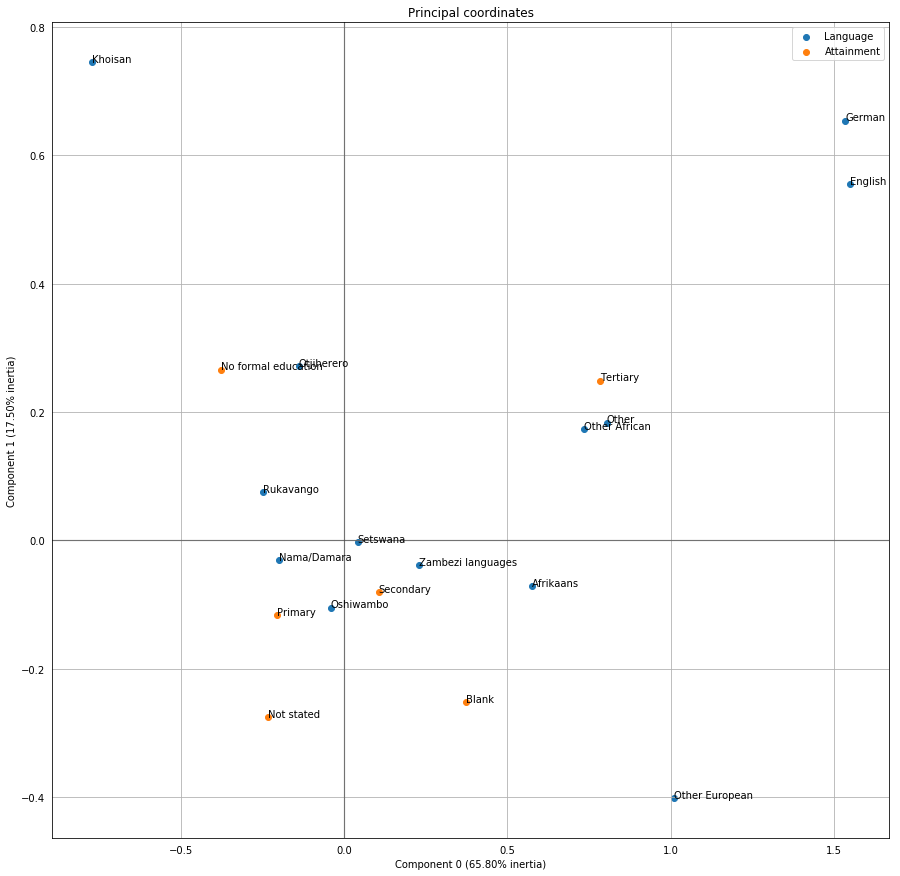

In [66]:
ax = ca.plot_coordinates(X=lang_att,ax=None,figsize=(15, 15),x_component=0,y_component=1,show_row_labels=True,show_col_labels=True)

In [67]:
# Chi-square Statistics
chisquare(lang_att)

Degree Of Freedom=60
[[2.75649158e+01 3.94301288e+01 6.03389495e+01 1.36884044e+01
  7.95837463e-01 4.18176412e+00]
 [1.07994054e+02 1.54479683e+02 2.36396432e+02 5.36285431e+01
  3.11793855e+00 1.63833499e+01]
 [1.88800793e+02 2.70069376e+02 4.13280476e+02 9.37561943e+01
  5.45094153e+00 2.86422200e+01]
 [2.40154609e+02 3.43528246e+02 5.25692765e+02 1.19257879e+02
  6.93359762e+00 3.64329039e+01]
 [2.43930624e+02 3.48929633e+02 5.33958375e+02 1.21133003e+02
  7.04261645e+00 3.70057483e+01]
 [8.70371655e+02 1.24501982e+03 1.90522299e+03 4.32216056e+02
  2.51288404e+01 1.32040634e+02]
 [5.85282458e+00 8.37215064e+00 1.28116947e+01 2.90644202e+00
  1.68979187e-01 8.87908821e-01]
 [1.34992567e+02 1.93099604e+02 2.95495540e+02 6.70356789e+01
  3.89742319e+00 2.04791873e+01]
 [6.23042616e+00 8.91228940e+00 1.36382557e+01 3.09395441e+00
  1.79881070e-01 9.45193261e-01]
 [2.09568880e+01 2.99777007e+01 4.58741328e+01 1.04069376e+01
  6.05054509e-01 3.17928642e+00]
 [6.60802775e+00 9.45242815e+

# STEP 2 -- Looking at the strength of association/correlation between our categorical variables using Cramer's V

In [71]:
## Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y, margins=False)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [72]:
cramers_v(mcads.language, mcads.attain)

0.17500400622176707

In [73]:
cramers_v(mcads.language, mcads.tenure)

0.18951254430130288

In [74]:
cramers_v(mcads.language, mcads.urbrur_head)

0.21191539257903413

In [75]:
cramers_v(mcads.language, mcads.income_source)

0.1310077492047931

In [76]:
cramers_v(mcads.language, mcads.age_group)

0.06469415401807288

In [77]:
cramers_v(mcads.language, mcads.sex_of_head)

0.1571120417784081

### For features age_group, sex_of_head, income_source, language the Cramer's V is not strong;


In [81]:
cramers_v(mcads.apci_groups, mcads.language)

0.2037348624705964

In [82]:
cramers_v(mcads.apci_groups, mcads.income_source)

0.16582308437169166

In [83]:
cramers_v(mcads.apci_groups, mcads.sex_of_head)

0.11412923835786208

In [84]:
cramers_v(mcads.apci_groups, mcads.age_group)

0.09767328603190178

In [85]:
cramers_v(mcads.apci_groups, mcads.urbrur_head)

0.20890312851021545

### In summary sex_of_head, income_source, language can be used in a model to predict apci_groups

### We will do just that in the Notebook Ads_Capstone.model_dte